In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
compas = pd.read_csv('data/compas-scores-two-years-violent.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [4]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'], errors='coerce')
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'], errors='coerce')

compas['v_screening_date'] = pd.to_datetime(compas['v_screening_date'], errors='coerce')
compas['vr_offense_date'] = pd.to_datetime(compas['vr_offense_date'], errors='coerce')

compas['c_offense_date'] = pd.to_datetime(compas['c_offense_date'], errors='coerce')
compas['c_arrest_date'] = pd.to_datetime(compas['c_arrest_date'], errors='coerce')

compas['compas_screening_date'] = pd.to_datetime(compas['compas_screening_date'], errors='coerce')


In [5]:
compas = compas.drop(['first','last','c_case_number','c_charge_degree', 'c_charge_desc', 'r_case_number','r_charge_degree','vr_case_number','vr_charge_degree','start','end','event'],axis=1)

#remove row with nan scores 
compas = compas.loc[compas['score_text'].notnull()]
#clean out the "-1" decile score from dataset 
compas = compas.loc[compas['v_decile_score'] != -1]

#label encodimg
compas['sex'] = compas['sex'].replace({'Male': 1, 'Female': 0})
compas['score_text'] = compas['score_text'].replace({'Low':0, 'Medium':1, 'High': 2})

#days in jail
compas['jail_out- jail_in'] = (compas['c_jail_out'] - compas['c_jail_in']).dt.days

In [34]:
compas.info()
df = pd.DataFrame(compas)
df.to_csv('./data/compas.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 4742
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4738 non-null   int64  
 1   name                     4738 non-null   object 
 2   compas_screening_date    4738 non-null   object 
 3   sex                      4738 non-null   int64  
 4   dob                      4738 non-null   object 
 5   age                      4738 non-null   int64  
 6   age_cat                  4738 non-null   object 
 7   race                     4738 non-null   object 
 8   juv_fel_count            4738 non-null   int64  
 9   decile_score             4738 non-null   int64  
 10  juv_misd_count           4738 non-null   int64  
 11  juv_other_count          4738 non-null   int64  
 12  priors_count             4738 non-null   int64  
 13  days_b_screening_arrest  4470 non-null   float64
 14  c_jail_in               

In [35]:
compas.describe(include=["object","category"]).T

,count,unique,top,freq
name,4738,4716,anthony gonzalez,2
compas_screening_date,4738,586,2013-01-15,23
dob,4738,3973,1985-11-02,4
age_cat,4738,3,25 - 45,2698
race,4738,6,African-American,2266
c_jail_in,4470,4470,2013-08-13 06:03:42,1
c_jail_out,4470,4461,2013-09-28 02:10:00,3
c_offense_date,3967,765,2013-01-14,21
c_arrest_date,760,425,2013-05-15,7
r_offense_date,995,675,2016-03-01,5


In [36]:
compas.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4738.0,5453.467919,3190.611730,1.0,2626.25,5474.5,8239.75,11000.0
sex,4738.0,0.789996,0.407354,0.0,1.00,1.0,1.00,1.0
age,4738.0,35.982693,12.187877,18.0,26.00,33.0,44.00,83.0
juv_fel_count,4738.0,0.045378,0.420913,0.0,0.00,0.0,0.00,20.0
decile_score,4738.0,3.983326,2.746394,1.0,1.00,3.0,6.00,10.0
juv_misd_count,4738.0,0.070916,0.406349,0.0,0.00,0.0,0.00,8.0
juv_other_count,4738.0,0.080836,0.469019,0.0,0.00,0.0,0.00,17.0
priors_count,4738.0,2.678767,4.085974,0.0,0.00,1.0,3.00,38.0
days_b_screening_arrest,4470.0,2.734452,78.116981,-345.0,-1.00,-1.0,-1.00,1057.0
c_days_from_compas,4727.0,72.760736,385.892451,0.0,1.00,1.0,2.00,9485.0


In [37]:
compas_race = compas['race'].value_counts()
compas_race

African-American    2266
Caucasian           1697
Hispanic             458
Other                279
Asian                 27
Native American       11
Name: race, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Caucasian'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Native American')])

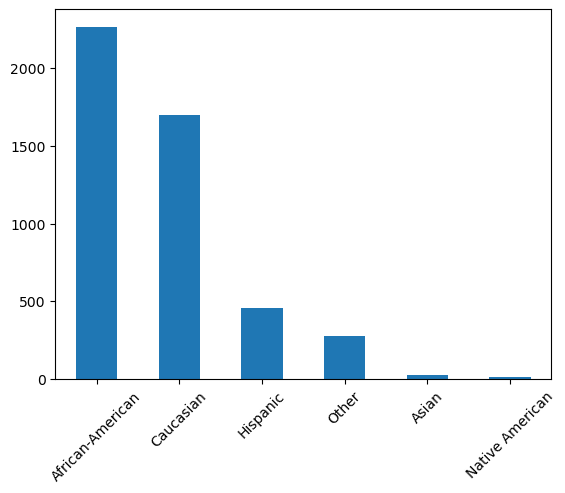

In [38]:
compas['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, '25 - 45'),
  Text(1, 0, 'Greater than 45'),
  Text(2, 0, 'Less than 25')])

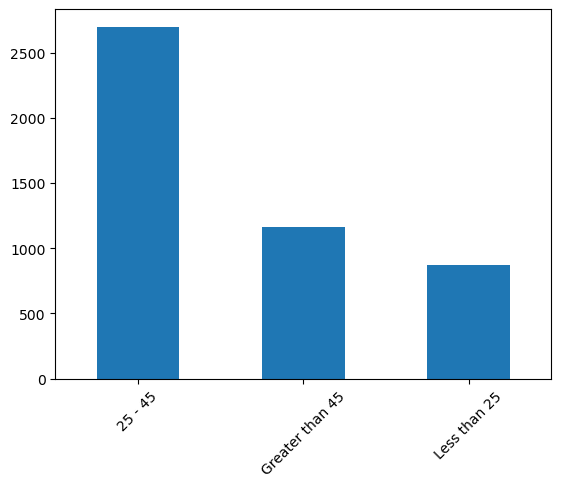

In [39]:
compas['age_cat'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [40]:
compas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4738 entries, 0 to 4742
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4738 non-null   int64  
 1   name                     4738 non-null   object 
 2   compas_screening_date    4738 non-null   object 
 3   sex                      4738 non-null   int64  
 4   dob                      4738 non-null   object 
 5   age                      4738 non-null   int64  
 6   age_cat                  4738 non-null   object 
 7   race                     4738 non-null   object 
 8   juv_fel_count            4738 non-null   int64  
 9   decile_score             4738 non-null   int64  
 10  juv_misd_count           4738 non-null   int64  
 11  juv_other_count          4738 non-null   int64  
 12  priors_count             4738 non-null   int64  
 13  days_b_screening_arrest  4470 non-null   float64
 14  c_jail_in               

In [41]:
corr_matrix = compas[['sex', 'age','juv_fel_count', 'decile_score', 
                    'juv_misd_count','juv_other_count','priors_count', 
                    'days_b_screening_arrest', 'c_days_from_compas', 'r_days_from_arrest', 'v_decile_score', 'jail_out- jail_in','score_text' ]].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

KeyError: "['jail_out- jail_in'] not in index"

In [42]:
corr_matrix.style.background_gradient(cmap='coolwarm')

NameError: name 'corr_matrix' is not defined

In [43]:
compas.head()

,id,name,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,two_year_recid,two_year_recid.1
0,1,miguel hernandez,2013-08-14,1,1947-04-18,69,Greater than 45,Other,0,1,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,0
1,3,kevon dixon,2013-01-27,1,1982-01-22,34,25 - 45,African-American,0,3,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,1,1
2,5,marcu brown,2013-01-13,1,1993-01-21,23,Less than 25,African-American,0,8,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,0
3,6,bouthy pierrelouis,2013-03-26,1,1973-01-22,43,25 - 45,Other,0,1,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,0
4,7,marsha miles,2013-11-30,1,1971-08-22,44,25 - 45,Other,0,1,...,2013-11-30,Risk of Violence,1,Low,2013-11-30,2013-11-30,2013-12-01,0,0,0
